# Group Assignment 3
In this notebook, Sine and Claire import twitter data, create word clouds, and conduct sentiment analysis for tweets under the search term "pop music" in Australia and the United States.

# Australia Word Cloud and Sentiment Analysis
## Importing libraries 
In this section, I imported all the necessary libraries to complete the data anaylsis

In [112]:
import pandas as pd
import numpy as np
import plotly.express as px
import osmnx as ox
import matplotlib.pyplot as plt

I imported basic libraries to complete basic statistic analysis

In [113]:
import tweepy as tw

I imported the tweepy library to get tweets

In [114]:
from textblob import TextBlob
import re

I imported libraries for sentiment analysis

In [115]:
from wordcloud import WordCloud, STOPWORDS

Here, I imported libraries to create word clouds

## Using Tweepy to connect with twitter
In this section, I used my twitter keys/secrets/tokens to connect the notebook with my Twitter developer account

In [116]:
consumer_key= '6mrAKtFISlscQZhkLPdRDq5We'
consumer_secret= 'irIJSsNfjESRE9XcF3mW0tXAb1Ha7epT1GhG7wy2G0KFoYFrY2'
access_token= '1361480549374644232-GgZGtNkfTbjeaT3TjR2IqOjNTthyHQ'
access_token_secret= 'GdvT3m6wlahZ6kJmWrQZUe4YfEMlAs0PVRuTg1iUtBXb9'

I stored my twitter developer keys/secrets/tokens into variables to prepare for authentication

In [117]:
# authenticate thyself with twitter
auth = tw.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tw.API(auth, wait_on_rate_limit=True)

I used autentication code to authenticate my twitter developer account

## Querying tweets by keyword: "pop music" and location: Australia
In this section, I query tweets to only show a max number of 500 tweets that have the keyword, "pop music" in a 2500km range from the central coordinate of Australia in order to encompass tweets from the entire country

In [118]:
searchterm = 'pop music'
q = searchterm + " -filter:retweets"
max_tweets = 500

In the code above, I defined the search query as my desired keyword, "pop music" and filtered out the retweets and stored the new search query in the variable, "q". I also stored the maximum number of tweets I wanted to extract (500) in the variable, "max_tweets."

In [119]:
 
# Creation of query method using parameters
tweets = tw.Cursor(api.search,
                   q=q,
                   geocode='-23.6980,133.8807,2500km', 
                   tweet_mode='extended').items(max_tweets)

In the code above, I create a query method by keyword using the parameters I defined above. This code queries a maximum of 500 tweets in a 2500km distance away from the center of Australia (geocode coordinates of -23.6980,133.8807) with the key word "pop music." I stored these queried tweets into the variable, "tweets."

In [120]:
for index, tweet in enumerate(tweets):
    print(str(tweet.created_at) + ': ' + tweet.full_text)

2021-02-24 03:25:52: Mohon FollowBack caramencinta Music Jazz / Pop / Rock ?
2021-02-24 02:28:02: The Guide to Getting Into K-Pop, South Korea's Record-Breaking Pop Music https://t.co/hBtzj3wFSg
2021-02-24 02:27:28: When I was young, adults listening to the music of their youth meant Zeppelin, The Beatles, Fleetwood Mac. Now here I am, nostalgic while I speed clean my house to early Fall Out Boy.

There's something a bit cooked about considering pop punk bands of the 00s "the classics" 🥴
2021-02-24 01:17:12: George Sheppard (with a little help from sisters Amy and Emma) gives us a compelling insight into @wearesheppard’s new album of pop pearls, Kaleidoscope Eyes.
@MGMDistribution
https://t.co/eh5WMh3PGp

#STACKmag #MGM #Sheppard #Music #MusicNews #KaleidoscopeEyes https://t.co/0qxNpN5q0U
2021-02-23 23:34:45: FUCK MAINSTREAM POP TWITTER MUSIC IS WHERE ITS AT #REVOLUTIONARY #TWITTERMUSIC
2021-02-23 21:55:54: @slowmayering Omg I still go back to this album so much. I actually never thoug

In the code above, I used a for loop to iterate through and print all queried texts.

## Converting JSON tweets into a dataframe
In this section, I convert the json tweets into a dataframe because the item iterator returned by tweepy disappears only having run a single loop.

In [121]:
tweets = tw.Cursor(api.search,
                   q=q,
                   geocode='-23.6980,133.8807,2500km', 
                   tweet_mode='extended').items(max_tweets)

Here I research the twitter space for a maximum of 500 tweets tweeted 2500km away from the center of Australia under the keyword, "pop music."

In [122]:
print(tweets)

When trying to print the tweets, the item iterator disappears. One solution to this is that before the tweet disappears, it can be stored into a dataframe.

In [123]:
# convert json tweets to dataframe
json_data = [tweet._json for tweet in tweets]

For every tweet in the variable, "tweets," it is dropped into a json data object.

In [124]:
df = pd.json_normalize(json_data)
df.head()

,created_at,id,id_str,full_text,truncated,display_text_range,source,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,...,quoted_status.favorite_count,quoted_status.favorited,quoted_status.retweeted,quoted_status.possibly_sensitive,quoted_status.lang,quoted_status.user.entities.url.urls,geo.type,geo.coordinates,coordinates.type,coordinates.coordinates
0,Wed Feb 24 03:25:52 +0000 2021,1364416225133039620,1364416225133039620,Mohon FollowBack caramencinta Music Jazz / Pop / Rock ?,False,"[0, 55]","<a href=""http://twittbot.net/"" rel=""nofollow"">twittbot.net</a>",NaN,None,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Wed Feb 24 02:28:02 +0000 2021,1364401670256427008,1364401670256427008,"The Guide to Getting Into K-Pop, South Korea's Record-Breaking Pop Music https://t.co/hBtzj3wFSg",False,"[0, 96]","<a href=""https://dlvrit.com/"" rel=""nofollow"">dlvr.it</a>",NaN,None,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Wed Feb 24 02:27:28 +0000 2021,1364401527557791754,1364401527557791754,"When I was young, adults listening to the music of their youth meant Zeppelin, The Beatles, Fleetwood Mac. Now here I am, nostalgic while I speed clean my house to early Fall Out Boy.\n\nThere's something a bit cooked about considering pop punk bands of the 00s ""the classics"" 🥴",False,"[0, 276]","<a href=""https://mobile.twitter.com"" rel=""nofollow"">Twitter Web App</a>",NaN,None,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Wed Feb 24 01:17:12 +0000 2021,1364383843894128640,1364383843894128640,"George Sheppard (with a little help from sisters Amy and Emma) gives us a compelling insight into @wearesheppard’s new album of pop pearls, Kaleidoscope Eyes.\n@MGMDistribution\nhttps://t.co/eh5WMh3PGp\n\n#STACKmag #MGM #Sheppard #Music #MusicNews #KaleidoscopeEyes https://t.co/0qxNpN5q0U",False,"[0, 261]","<a href=""https://www.hootsuite.com"" rel=""nofollow"">Hootsuite Inc.</a>",NaN,None,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Tue Feb 23 23:34:45 +0000 2021,1364358065173143552,1364358065173143552,FUCK MAINSTREAM POP TWITTER MUSIC IS WHERE ITS AT #REVOLUTIONARY #TWITTERMUSIC,False,"[0, 78]","<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",NaN,None,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In this code, I convert the json data into a dataframe

In [125]:
df.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 164 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   created_at                                             180 non-null    object 
 1   id                                                     180 non-null    int64  
 2   id_str                                                 180 non-null    object 
 3   full_text                                              180 non-null    object 
 4   truncated                                              180 non-null    bool   
 5   display_text_range                                     180 non-null    object 
 6   source                                                 180 non-null    object 
 7   in_reply_to_status_id                                  49 non-null     float64
 8   in_reply_to_status_id_str                        

In this code, I used the `.info()` command to view all of the fields in the twitter data.

In [126]:
df = df[['created_at','full_text','user.screen_name','user.profile_image_url_https']]
df.columns = ['created_at','text','screen_name','profile_image'] 

In the above code, I trimmed the columns to only include relevant fields and renamed the columns in the df dataframe to only include data in the specified fields.

In [127]:
pd.set_option('display.max_colwidth', None)

In the above code, I overrode the default display to be able to see the entire text of every tweet without truncation

In [128]:
df.sample(5)

,created_at,text,screen_name,profile_image
176,Tue Feb 16 08:06:12 +0000 2021,"K/DA - POP/STARS (ft. Madison Beer, (G)I-DLE, Jaira Burns) | Music Video... https://t.co/a3lUCzHSBz @YouTubeより",viser0322,https://pbs.twimg.com/profile_images/1332351386516738049/O_6Jn-Tu_normal.jpg
25,Tue Feb 23 02:39:40 +0000 2021,How K-Pop Group Shinee Stands The Test of Time – Rolling Stone\n#SHINee #샤이니 @SHINee https://t.co/lbQzblZcoC,taemvelys,https://pbs.twimg.com/profile_images/1318040669726732288/VDrhpz2M_normal.jpg
2,Wed Feb 24 02:27:28 +0000 2021,"When I was young, adults listening to the music of their youth meant Zeppelin, The Beatles, Fleetwood Mac. Now here I am, nostalgic while I speed clean my house to early Fall Out Boy.\n\nThere's something a bit cooked about considering pop punk bands of the 00s ""the classics"" 🥴",meetreagancole,https://pbs.twimg.com/profile_images/1363775485834973184/uItHycAe_normal.jpg
137,Wed Feb 17 22:51:42 +0000 2021,@MacKonstantin You may also heard the music pop up in places.,thehoodieguy22,https://pbs.twimg.com/profile_images/1363209362316029952/cT_tFIkb_normal.jpg
123,Thu Feb 18 07:34:36 +0000 2021,@urban_elegance 08-14 was the last great pop era. And I’d argue... music in general... was at its peak.\n\nHasn’t been the same sense.,ItsATsWorld,https://pbs.twimg.com/profile_images/1305926826229788674/NPcLd75k_normal.jpg


Used the `sample(5)` command to view a random sample of 5 tweets in the dataframe.

In [129]:
df.shape

(180, 4)

Used the `.shape` function to view how many rows and columns there are in the dataframe. From this code, I know that there were only 117 tweets extracted within a distance of 2500km away from the center of Australia.

## Creating a Word Cloud
In this section, I clean the tweets to create a word cloud which visually displays word clusters in which words with greater frequency appear on the word cloud in a larger font size while less frequent words appear on the word cloud in a smaller fonts size.

In [130]:
def clean_tweet(tweet):
    return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", "", tweet).split())

A function, "clean_tweet" is created that cleans tweets using regular expressions so that they do not have any strange characters or emojis

In [131]:
tweet = df.sample().text.values[0]
print(tweet)
clean_tweet(tweet)

@LokiMusic2 @RBWHFoundation @stairwellprojct A mixture of light music from Renaissance to evergreen pop melodies.


'A mixture of light music from Renaissance to evergreen pop melodies'

In this code, I use the function defined above to clean a sample tweet from the dataframe.

In [132]:
df['clean_text'] = ''

In the code above, I create a new column for the clean text.

In [133]:
for i, row in df.iterrows():
    clean = clean_tweet(row.text)
    df.at[i,'clean_text'] = clean

I loop through each row in the df dataframe and add the cleaned tweet into the new column

In [134]:
df.sample(5)[['text','clean_text']]

,text,clean_text
76,"Finally after all the dramas, tears and fears, you made it @just.marizqi \nHmmm maybe i'll make another song for you, dare for the challenge? XD\n\n#music #musikhits #pop #poprock #friends #trending https://t.co/1E2korEuyy",Finally after all the dramas tears and fears you made it marizqi Hmmm maybe ill make another song for you dare for the challenge XDmusic musikhits pop poprock friends trending
110,I wonder if we’re ever going to get anymore pop smoke music 😞🙏🏽,I wonder if were ever going to get anymore pop smoke music
35,"Influences for this music video were City Pop videos, @MONDOGROSSO_JP - Labryinth + @JessieWare 's Soul Control / Step Into My Life m/vs which are all huge influences",Influences for this music video were City Pop videos JP Labryinth s Soul Control Step Into My Life mvs which are all huge influences
37,"BLACKPINK’s “Lovesick Girls” Guards No. 1 Spot; Soompi’s K-Pop Music Chart 2021, February Week 3 https://t.co/BGoCOwAxYb",BLACKPINKs Lovesick Girls Guards No 1 Spot Soompis KPop Music Chart 2021 February Week 3
132,@jaytholen overuse of bad cgi in music videos and everything looking kinda shiny\n64mb mp3 players that cost $150 a pop\nusing webrings to find new websites and how some had those little chat box things on the side\nforums,overuse of bad cgi in music videos and everything looking kinda shiny64mb mp3 players that cost 150 a popusing webrings to find new websites and how some had those little chat box things on the sideforums


In the code above, I used the `.sample(5)` command to look at the text and clean_text columns of 5 random samples of tweets

In [135]:
all_text = ' '.join(df['clean_text'])
all_text

'Mohon FollowBack caramencinta Music Jazz Pop Rock The Guide to Getting Into KPop South Koreas RecordBreaking Pop Music When I was young adults listening to the music of their youth meant Zeppelin The Beatles Fleetwood Mac Now here I am nostalgic while I speed clean my house to early Fall Out BoyTheres something a bit cooked about considering pop punk bands of the 00s the classics George Sheppard with a little help from sisters Amy and Emma gives us a compelling insight into s new album of pop pearls Kaleidoscope EyesSTACKmag MGM Sheppard Music MusicNews KaleidoscopeEyes FUCK MAINSTREAM POP TWITTER MUSIC IS WHERE ITS AT REVOLUTIONARY TWITTERMUSIC Omg I still go back to this album so much I actually never thought of it as pop teen idol music It was only Johns consistent banter about YBIAW that ever made me think of it that way Its amazing how ppl can be so individual Totally understand if its not your flavour 5am on the bus At least I got my music The Fezzy Pop to wake me up gently Im i

Here I put every word from every tweet into a single variable so all the tweets are in one wall of text

In [136]:
list(STOPWORDS)

['by',
 "didn't",
 'was',
 "when's",
 'http',
 'themselves',
 "can't",
 'of',
 'otherwise',
 'on',
 'having',
 "aren't",
 'yourself',
 'they',
 'her',
 'yours',
 'hers',
 'all',
 'ourselves',
 'against',
 'under',
 'their',
 "they'll",
 "there's",
 'had',
 'have',
 "won't",
 'than',
 "we'll",
 'doing',
 'those',
 "she'll",
 'out',
 'can',
 'each',
 'our',
 "we'd",
 "she'd",
 'both',
 'has',
 "how's",
 'am',
 'further',
 "they're",
 'are',
 'we',
 'himself',
 'while',
 "don't",
 'most',
 'also',
 'but',
 "they'd",
 "we've",
 'be',
 'because',
 'which',
 'below',
 'hence',
 "it's",
 'no',
 "he's",
 'itself',
 'i',
 'how',
 'shall',
 'where',
 'your',
 'been',
 'more',
 'or',
 'just',
 "wasn't",
 "he'll",
 'the',
 'should',
 'a',
 "i'd",
 'if',
 'up',
 "doesn't",
 "hadn't",
 'to',
 'herself',
 'again',
 'his',
 'off',
 'only',
 "you're",
 'since',
 "i'll",
 'few',
 "you'd",
 "shan't",
 'down',
 'after',
 'however',
 "he'd",
 "isn't",
 'an',
 'very',
 'during',
 'like',
 'them',
 'r',
 "we

WordCloud comes with default stopwords and I have listed them above.

In [137]:
stop_words = [searchterm] + list(STOPWORDS)

In the above code, I append the query term, "pop music" to the list of stop words to prevent it from being the largest word in the word cloud.

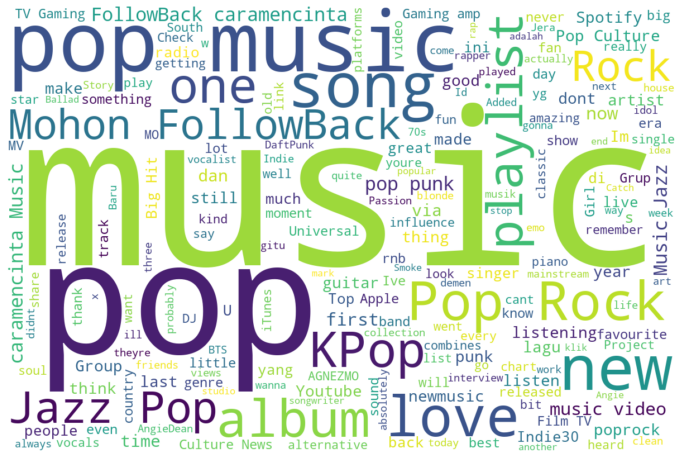

In [138]:
# create the word cloud
wordcloud = WordCloud(width=1200, 
                      height=800,
                      background_color="white",
                      stopwords=stop_words).generate(all_text)

# Display the WordCloud                    
plt.figure(figsize=(12,12))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

The code above creates and displays the word cloud. 
This word cloud shows words that Australian twitter users associate with pop music and the topics/other music genres users view as being adjacent and related to pop music. Many of the words are positive, such as "Happy," "new," and "love" and also contain other media topics associated with pop music like "music video" and "YouTube." There are also a lot of other genres shown above that users assoicate with pop music, showing that Australians view pop music as an intersection of many other music genres. In Australia, more users tweet about pop music as being "new," showing that users use Twitter to discuss about new music.

## Sentiment Analysis
In this section, I conduct a sentiment analysis on the tweets from Australia.
The sentiment property returns a tuple of the form `Sentiment(polarity, subjectivity)`. The polarity score ranges from -1 (most negative) to +1 (most positive). The subjectivity ranges from 0 to 1, where 0.0 is very objective and 1.0 is very subjective.

In [139]:

tweet = df.sample().clean_text.values[0]
print(tweet)

a = TextBlob(tweet)

a.sentiment

Added to PopRock An Indie30 New Music Playlist on Spotify Blindness by Maripool poprock newmusic indie30


Sentiment(polarity=0.13636363636363635, subjectivity=0.45454545454545453)

In the code above, I tested the sentiment analysis by calculating the polarity on one text. I used the command, `.sample()` to get a random tweet, then printed the tweet, analyzed the tweet using TextBlob and displayed the sentiment polarity.

In [140]:
# create an new (empty) column for polarity
df['polarity']=''

I created a new, empty column in the dataframe to store the sentiment polarities.

In [141]:
for i, row in df.iterrows():
    a = TextBlob(row.clean_text)
    df.at[i,'polarity'] = a.polarity

The code above loops through every row in the dataframe and adds the polarity value into the new column.

In [142]:
df[['clean_text','polarity']].sample(5)

,clean_text,polarity
130,Mohon FollowBack caramencinta Music Jazz Pop Rock,0
178,2x gue ke RSPAU selalu dapet live music yg pertama liat permainan gamelan syahdu gitu yg ini skrg genrenya ganti pop mantap kali bikin nggak boring nunggu,-0.431818
6,5am on the bus At least I got my music The Fezzy Pop to wake me up gently,-0.05
84,newer hyperpop artists r sooo serious about it and for what not relevant to the like osquinn side but the dorian electra side i feel like it went downhill when ppl started over politicising trashy pop music and turning the entire concept of it into a marketing scheme,-0.177778
90,wilson I was making a rhetorical point that the Reductio ad absurdum of the argument could end in eugenics I didnt accuse him of it Youre simply not sufficient to the conversation Try pop music or sports or whatever to troll,0


In the above code, I took a sample of 5 tweets and displayed them, only showing the columns, "clean_text" and "polarity"

In [143]:
conditions = [
    (df['polarity'] < -0.2), # very negative
    (df['polarity'] < 0) & (df['polarity'] >= -0.2),   # negative
    (df['polarity'] == 0),  # neutral
    (df['polarity'] > 0) & (df['polarity'] <= 0.2),    # positive
    (df['polarity'] > 0.2)  # very positive
    ]

In order to quantify the results and labelling tweets as either being positive, neutral, or negative, I created a list of conditions that gave polarity scores categorical values. For instance, a very negative polarity would have a score less than -0.2, a negative polarity would have a score between -0.2 and 0, a neutral score would have a polarity of 0, a positive score would have a polarity between 0 and 0.2, and a very positive score would have a polarity greater than 0.2.



In [144]:
values = [
    'very negative', 
    'negative', 
    'neutral', 
    'positive',
    'very positive'
    ]

Here is a list of values I labeled above that we want to assign for each condition.

In [145]:
df['sentiment'] = np.select(conditions, values)

In the code above, I create a new column called 'sentiments' in the dataframe and use `np.select` to assign values to it using our lists and conditions.

In [146]:
df.sample(5)[['clean_text','polarity','sentiment']]

,clean_text,polarity,sentiment
29,Happy Tuesday What have you be listening to lately Share some tunes with meAngie x music listening share playlist joy fun AngieDeanMusic AngieDean singer vocals vocalist pianist piano blonde glamorus jazz pop rnb,0.32,very positive
161,For me Slowdive would be the one that Id recommend Not much pop or punk in Slowdives music just big washes of sound and dreamy atmospheres,0.1,positive
117,Celine Gabriele curi perhatian dengan bawakan lagu Korea dari Red VelvetTheVoiceKidsIndonesia TVKI,0,neutral
172,Billie Eilish cried out of joy after watching her Apple TV documentary The 19yearold pop megastar banned her family including her sibling and regular collaborator Finneas from seeing Billie Eilish The Worlds a Little Blurry,0.153125,positive
32,this one hurts seriously changed the game for dance music and synth pop,-0.366667,very negative


I displayed 5 random samples of the updated dataframe with the clean_text, polarity, and sentiment columns

In [147]:
sentiment_colors = ox.plot.get_colors(5,cmap='PiYG',return_hex=True)

Here I get five colors from a sequential color bar

In [148]:
# bar chart
fig = px.bar(df, 
             x='sentiment',
             width=600,
             title='Sentiment analysis for "'+ searchterm + '"',
             color='sentiment',
             category_orders = {'sentiment':['very negative','negative','neutral','positive','very positive']},
             color_discrete_sequence=sentiment_colors, # use the colors selected in previous cell
            )
# fig.update_traces(textinfo='value')
fig.update_traces(marker_line_width=0) # gets rid of horizontal white lines
fig.show()

In the code above, I create a bar graph for the sentiment analysis for the dataframe. The bars measure the frequency of tweets for the different categories for sentiment analysis

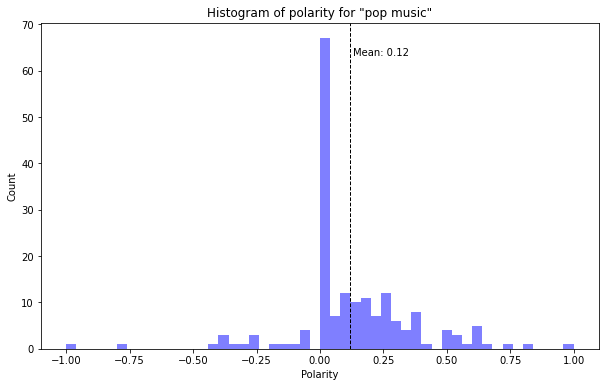

In [149]:
# histogram
num_bins = 50
plt.figure(figsize=(10,6))
n, bins, patches = plt.hist(df.polarity, num_bins, facecolor='blue', alpha=0.5)
plt.xlabel('Polarity')
plt.ylabel('Count')
plt.title('Histogram of polarity for "' + searchterm + '"')

plt.axvline(df.polarity.mean(), color='k', linestyle='dashed', linewidth=1)

min_ylim, max_ylim = plt.ylim()
plt.text(df.polarity.mean()*1.1, max_ylim*0.9, 'Mean: {:.2f}'.format(df.polarity.mean()))

plt.show();

The code above plots a histogram that plots the frequency of songs for each polarity and a line for where the mean polarity is located. From the histogram, it is clear that Australians enjoy pop music because their mean polarity (0.12) is above 0 and in the positive range. Also, most of the tweets have a neutral polarity.

# United States Word Cloud and Sentiment Analysis
To do my Twitter analysis, I used the twitter.py command line code to archive a set of tweets over time. These tweets contain the search term, 'pop music,' and are extracted from the United States. While creating this new object, I will also set an option to see the entire text in the column, and drop duplicate tweets from the data frame.

In [150]:
df = pd.read_csv('tweets.csv')

# override the default so that we can see the entire text in the column
pd.set_option('display.max_colwidth', None)

# drop duplicates
df = df.drop_duplicates()

df.head(10)

,created_at,text,screen_name,profile_image
0,Tue Feb 23 19:46:42 +0000 2021,https://t.co/n2DOhajVhF,DaDemolitionMan,https://pbs.twimg.com/profile_images/1361027001935679495/xU59xaS__normal.jpg
1,Tue Feb 23 19:33:44 +0000 2021,"I can not promise I will listen to radio country music. I just can’t do it, it’s like nails to a chalk board, it makes me physically ill. Blue grass is fine, or less pop style country is okay to, but most country music is not my style.",cailyn_17,https://pbs.twimg.com/profile_images/1359783756949782529/sIh9d0fx_normal.jpg
2,Tue Feb 23 19:24:34 +0000 2021,Pop Enemies Out Now 🔥🔥 \n\nhttps://t.co/raTupB6EEx\n\n#rapper #rap #hiphop #music #artist #producer #dj #soundcloud #beats #newmusic #trap #hiphopmusic #love #musicproducer #singer #rappers #art #rnb #musician #studio #instagood #follow #like #SmallStreamersConnect y,jusstakczmusic,https://pbs.twimg.com/profile_images/1358724613568679937/9P1Xf-06_normal.jpg
3,Tue Feb 23 19:22:43 +0000 2021,Pop Enemies Out Now 🔥🔥 \n\nhttps://t.co/raTupB6EEx\n\n#rapper #rap #hiphop #music #artist #producer #dj #soundcloud #beats #newmusic #trap #hiphopmusic #love #musicproducer #singer #rappers #art #rnb #musician #studio #instagood #follow #like #SmallStreamersConnect https://t.co/BD776eXA3x,jusstakczmusic,https://pbs.twimg.com/profile_images/1358724613568679937/9P1Xf-06_normal.jpg
4,Tue Feb 23 19:14:13 +0000 2021,"If I could write music, I would be writing some killer Pop Punk tracks right now lemme tell ya",SuperPuppy448,https://pbs.twimg.com/profile_images/1326302282217086982/th84aSyq_normal.jpg
5,Tue Feb 23 19:11:22 +0000 2021,"a bit early for his birthday but, here is ollie from Pop'n music sunny park performing some tricks on his snowboard. https://t.co/YKVA7D7QaJ",Ktchelle12,https://pbs.twimg.com/profile_images/1356301027394392069/6aTguX4J_normal.jpg
6,Tue Feb 23 19:10:41 +0000 2021,"Tetra the angel fish from Pop'n Music 9. eh, not my best art.. https://t.co/C3mnZv8jG1",Ktchelle12,https://pbs.twimg.com/profile_images/1356301027394392069/6aTguX4J_normal.jpg
7,Tue Feb 23 19:09:21 +0000 2021,🎸 Drop your links ! \n#spotify #Playlist Submissions\nIncrease continuously your listeners audience\n\n🔥Try it now =&gt; https://t.co/H7YQDdHPa1 \n\n-Promote organically your new music\n-Track submission to Playlists\n-Playlists for many music genres (HipHop Pop Rock EDM Indie) https://t.co/rW8DSXbZ7k,ArtistsandMusic,https://pbs.twimg.com/profile_images/639878411918405632/wkQatrEL_normal.jpg
8,Tue Feb 23 19:02:25 +0000 2021,has rina cited janet as an influence? cause she definitely is omg. this sound comes from britney which first came from janet. it’s just so crazy how janets influence will reverberate throughout pop music forever https://t.co/DryLIBB49S,sexysadclown,https://pbs.twimg.com/profile_images/1361426869539778560/Nz9b2mcf_normal.jpg
9,Tue Feb 23 19:00:01 +0000 2021,The Norman Music Festival Transmissions series will feature Norman-based art rock artist Kat Lock on its Feb. 26 livestream: https://t.co/BE8IpXLZKk,OUDaily,https://pbs.twimg.com/profile_images/690569517672456192/2OiRI5-q_normal.png


Fom the output above, I can see my new data frame object with all the tweets listed out, along with the date, screen name, and profile image.

Next, I will clean the tweets. First, I will use the library `re` to clean the text. Then, I will create a new column in the data frame containing the cleaned text. Using a loop, I can repeat this action on all the tweets in my data frame.

In [151]:
# Clean the tweets
#

# function to clean tweets using regular expressions
def clean_tweet(tweet):
    return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", "", tweet).split())

# create a new column for the clean text
df['clean_text'] = ''

# loop and add the cleaned up text to the new column
for i, row in df.iterrows():
    clean = clean_tweet(row.text)
    df.at[i,'clean_text'] = clean
    
df

,created_at,text,screen_name,profile_image,clean_text
0,Tue Feb 23 19:46:42 +0000 2021,https://t.co/n2DOhajVhF,DaDemolitionMan,https://pbs.twimg.com/profile_images/1361027001935679495/xU59xaS__normal.jpg,
1,Tue Feb 23 19:33:44 +0000 2021,"I can not promise I will listen to radio country music. I just can’t do it, it’s like nails to a chalk board, it makes me physically ill. Blue grass is fine, or less pop style country is okay to, but most country music is not my style.",cailyn_17,https://pbs.twimg.com/profile_images/1359783756949782529/sIh9d0fx_normal.jpg,I can not promise I will listen to radio country music I just cant do it its like nails to a chalk board it makes me physically ill Blue grass is fine or less pop style country is okay to but most country music is not my style
2,Tue Feb 23 19:24:34 +0000 2021,Pop Enemies Out Now 🔥🔥 \n\nhttps://t.co/raTupB6EEx\n\n#rapper #rap #hiphop #music #artist #producer #dj #soundcloud #beats #newmusic #trap #hiphopmusic #love #musicproducer #singer #rappers #art #rnb #musician #studio #instagood #follow #like #SmallStreamersConnect y,jusstakczmusic,https://pbs.twimg.com/profile_images/1358724613568679937/9P1Xf-06_normal.jpg,Pop Enemies Out Now rapper rap hiphop music artist producer dj soundcloud beats newmusic trap hiphopmusic love musicproducer singer rappers art rnb musician studio instagood follow like SmallStreamersConnect y
3,Tue Feb 23 19:22:43 +0000 2021,Pop Enemies Out Now 🔥🔥 \n\nhttps://t.co/raTupB6EEx\n\n#rapper #rap #hiphop #music #artist #producer #dj #soundcloud #beats #newmusic #trap #hiphopmusic #love #musicproducer #singer #rappers #art #rnb #musician #studio #instagood #follow #like #SmallStreamersConnect https://t.co/BD776eXA3x,jusstakczmusic,https://pbs.twimg.com/profile_images/1358724613568679937/9P1Xf-06_normal.jpg,Pop Enemies Out Now rapper rap hiphop music artist producer dj soundcloud beats newmusic trap hiphopmusic love musicproducer singer rappers art rnb musician studio instagood follow like SmallStreamersConnect
4,Tue Feb 23 19:14:13 +0000 2021,"If I could write music, I would be writing some killer Pop Punk tracks right now lemme tell ya",SuperPuppy448,https://pbs.twimg.com/profile_images/1326302282217086982/th84aSyq_normal.jpg,If I could write music I would be writing some killer Pop Punk tracks right now lemme tell ya
...,...,...,...,...,...
222,Sat Feb 20 23:30:48 +0000 2021,Rap game getting ugly lemme go listen to my pop an rnb music chile whew,shelly_400,https://pbs.twimg.com/profile_images/1343095938483707904/WznRkHlN_normal.jpg,Rap game getting ugly lemme go listen to my pop an rnb music chile whew
223,Sat Feb 20 23:25:01 +0000 2021,Working on a cover that’s out of this world 🌎 🚀 \n\n#davidbowie \n\n#subtlecitizen #spaceoddity #music #funk #indie #pop #alt #singersongwriter #memphis #memphismusic #musica #musician #love #vintage #hashtag #musicproduction #composer #arranger #studiolife https://t.co/zMRSypJ0ZJ,subtlecitizen,https://pbs.twimg.com/profile_images/1315667715340800001/Icm1KEui_normal.jpg,Working on a cover thats out of this world davidbowie subtlecitizen spaceoddity music funk indie pop alt singersongwriter memphis memphismusic musica musician love vintage hashtag musicproduction composer arranger studiolife
224,Sat Feb 20 22:51:04 +0000 2021,Pop-Rock music is just Pop music.\nChange my mind.,Core_Divide,https://pbs.twimg.com/profile_images/1019855842139549696/Xnam0kwV_normal.jpg,PopRock music is just Pop musicChange my mind
1511,Mon Feb 22 02:33:37 +0000 2021,It’s pop music https://t.co/c401zkyyAB,loltsuki,https://pbs.twimg.com/profile_images/1359223885795782659/w4Yh0NT8_normal.jpg,Its pop music


As shown in the above output, the clean text column has been successfully created and added to my original data frame. 

With the cleaned data, I can start to create visualizations. To analyze the data, I will first be creating a word cloud. To do this, I will create a new variable with the words from every tweet, and then use this variable to create and display the word cloud visualization.

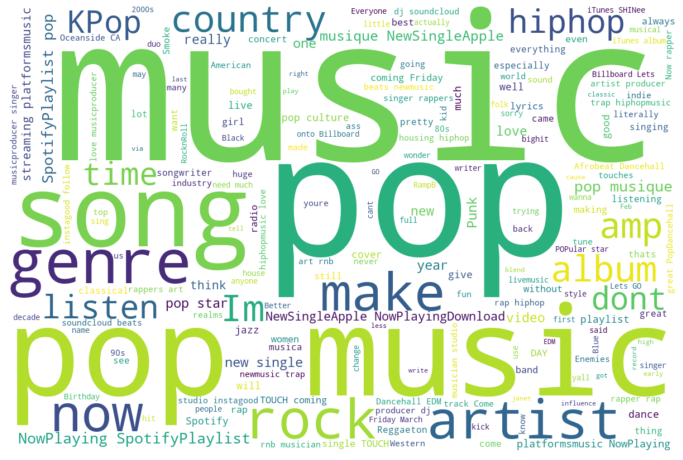

In [152]:
# Word cloud
#

# now put every word from every tweet into a single variable
all_text = ''.join(df['clean_text'])
    
# create the word cloud
wordcloud = WordCloud(width=1200, 
                      height=800,
                      background_color="white").generate(all_text)

# Display the WordCloud                    
plt.figure(figsize=(12,12))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")

plt.show()  

The word cloud above displays the most commonly used words in the archived 'pop music' tweets. In the cloud, we can see what topics and phrases are most associated with popular music. Furthermore, we can get a glimpse into the general sentiment behind pop music online. There are various genres other than pop making an appearance, such as rock, country, hip hop, and Kpop. These could indicate other popular genres in the United States. Also, the inclusion of phrases such as 'SpotifyPlaylist' and 'NewSingleApple' show the increase of music marketing online and how streaming has become essential to the music industry.

Next, I will be doing sentiment analysis by creating a new variable for polarity and visualizing it with a histogram. To do this, I will create a new empty column named 'polarity,' and then use a loop and the `TextBlob` library to algorithmically assess and assign polarity values to every tweet.

In [153]:
# Sentiment Analysis
#

# create an new (empty) column for polarity
df['polarity']=''

# loop through every row and add the polarity value in our new column
for i, row in df.iterrows():
    a = TextBlob(row.clean_text)
    df.at[i,'polarity'] = a.polarity
df.head()

,created_at,text,screen_name,profile_image,clean_text,polarity
0,Tue Feb 23 19:46:42 +0000 2021,https://t.co/n2DOhajVhF,DaDemolitionMan,https://pbs.twimg.com/profile_images/1361027001935679495/xU59xaS__normal.jpg,,0
1,Tue Feb 23 19:33:44 +0000 2021,"I can not promise I will listen to radio country music. I just can’t do it, it’s like nails to a chalk board, it makes me physically ill. Blue grass is fine, or less pop style country is okay to, but most country music is not my style.",cailyn_17,https://pbs.twimg.com/profile_images/1359783756949782529/sIh9d0fx_normal.jpg,I can not promise I will listen to radio country music I just cant do it its like nails to a chalk board it makes me physically ill Blue grass is fine or less pop style country is okay to but most country music is not my style,0.125
2,Tue Feb 23 19:24:34 +0000 2021,Pop Enemies Out Now 🔥🔥 \n\nhttps://t.co/raTupB6EEx\n\n#rapper #rap #hiphop #music #artist #producer #dj #soundcloud #beats #newmusic #trap #hiphopmusic #love #musicproducer #singer #rappers #art #rnb #musician #studio #instagood #follow #like #SmallStreamersConnect y,jusstakczmusic,https://pbs.twimg.com/profile_images/1358724613568679937/9P1Xf-06_normal.jpg,Pop Enemies Out Now rapper rap hiphop music artist producer dj soundcloud beats newmusic trap hiphopmusic love musicproducer singer rappers art rnb musician studio instagood follow like SmallStreamersConnect y,0.5
3,Tue Feb 23 19:22:43 +0000 2021,Pop Enemies Out Now 🔥🔥 \n\nhttps://t.co/raTupB6EEx\n\n#rapper #rap #hiphop #music #artist #producer #dj #soundcloud #beats #newmusic #trap #hiphopmusic #love #musicproducer #singer #rappers #art #rnb #musician #studio #instagood #follow #like #SmallStreamersConnect https://t.co/BD776eXA3x,jusstakczmusic,https://pbs.twimg.com/profile_images/1358724613568679937/9P1Xf-06_normal.jpg,Pop Enemies Out Now rapper rap hiphop music artist producer dj soundcloud beats newmusic trap hiphopmusic love musicproducer singer rappers art rnb musician studio instagood follow like SmallStreamersConnect,0.5
4,Tue Feb 23 19:14:13 +0000 2021,"If I could write music, I would be writing some killer Pop Punk tracks right now lemme tell ya",SuperPuppy448,https://pbs.twimg.com/profile_images/1326302282217086982/th84aSyq_normal.jpg,If I could write music I would be writing some killer Pop Punk tracks right now lemme tell ya,0.285714


As shown in the `head` output above, a new column called 'polarity' has been added.

Now, we can create a histogram visualization using `matplotlib`. To this histogram, I will also add a vertical line to represent the mean polarity for all the tweets.

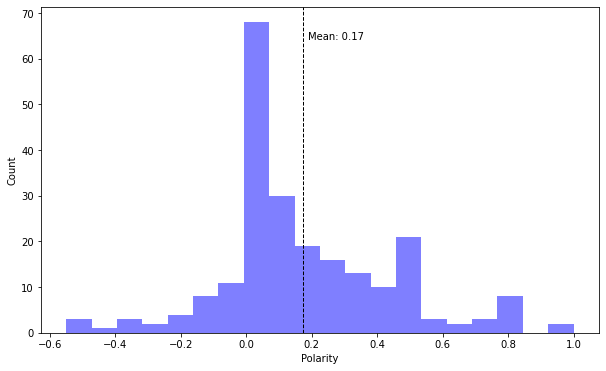

In [154]:
# set up the histogram
plt.figure(figsize=(10,6))

n, bins, patches = plt.hist(df.polarity, 
                            bins=20, 
                            facecolor='blue', 
                            alpha=0.5)

plt.xlabel('Polarity')
plt.ylabel('Count')

# add the mean
plt.axvline(df.polarity.mean(), 
            color='k', 
            linestyle='dashed', 
            linewidth=1)

# label the mean
min_ylim, max_ylim = plt.ylim()
plt.text(df.polarity.mean()*1.1, max_ylim*0.9, 'Mean: {:.2f}'.format(df.polarity.mean()))

plt.show();

The histogram above displays the number of tweets within each polarity value. From the chart, we can see that the mean sentiment value for the United States is 0.17. This means that the sentiment around 'pop music' in the United States is generally positive. We can also see this in the distribution. Although a large amount of tweets are neutral, there are clearly most tweets on the positive scale, rather than distributed in the negatives.

# Data Analysis for Australia and the US
In this section, Sine and Claire compare and contrast the twitter data visualizations in both Australia and the United States.

## Word Cloud

In both Australia and the United States, the word cloud shows that modern media plays a large role in pop music. In both word clouds words such as, "Spotify," "YouTube," "video," and "download," show that many users listen to pop music digitally. In addition, pop music listeners in both countries assoicate pop music with many other genres such as "rock," "hip hop," and "country" showing that pop music is a very prevalent and popular music genre and shares similarities with many other genres as well.
In the United States, more twitter users tweet about "hip hop" when discussing pop music. However, in Australia, more users associate the "punk" and "kpop" genres with pop music. This shows that the style of popular pop music in the United States and Australia are potentially different in which pop music in Australia is more punk and music in the U.S. tends to lean more to hip hop.

## Sentiment Analysis

When looking at the sentiment charts, both Australia and the United States have a positive mean sentiment value. Australia had an average of 0.15, while the US had an average of 0.17. The distribution in both charts are also similar, with a majority of tweets being neutral. Sentiment towards pop music within the two countries are similar, and generally positive.

## Group Project Roles
Claire worked on the Australia word cloud and sentiment analysis.

Sine worked on the United States word cloud and sentiment analysis.

Claire and Sine both worked together to compare and contrast the data visualizations for twitter data in the United States and Australia.